In [ ]:
%cd /content/

/content


In [ ]:
!rm -rf voyager/

In [ ]:
!git clone https://github.com/eshnil2000/voyager

Cloning into 'voyager'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 349 (delta 150), reused 120 (delta 120), pack-reused 182
Receiving objects: 100% (349/349), 76.71 KiB | 12.78 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [ ]:
%cd /content/voyager/

/content/voyager


In [ ]:
!cp /content/drive/MyDrive/data/623.xalancbmk-s5.txt.xz .
!xz --decompress 623.xalancbmk-s5.txt.xz

In [ ]:
!cp /content/drive/MyDrive/data/trace-3rd-run-1M.out.tar.gz .
! tar -xvf trace-3rd-run-1M.out.tar.gz
!cp trace-3rd-run-1M.out in.txt

trace-3rd-run-1M.out


In [ ]:
!head -600000 623.xalancbmk-s5.txt >testxalanc.txt

In [ ]:
!cp 623.xalancbmk-s5.txt testxalanc.txt

In [ ]:
!wc -l testxalanc.txt

741261 testxalanc.txt


In [ ]:
!head -741262 trace-3rd-run-1M.out >test_temp.txt

In [ ]:
!cp trace-3rd-run-1M.out test_temp.txt

In [ ]:
!wc -l testxalanc.txt test_temp.txt

  741261 testxalanc.txt
  741262 test_temp.txt
 1482523 total


In [ ]:
!head -5 test_temp.txt

Attaching 1 probe...
ts=1988336 pid=745  inst=1835086430414849 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2fc30
ts=1988336 pid=745  inst=1835086448240641 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2e9b0
ts=1988336 pid=745  inst=1835086452482561 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2d730
ts=1988336 pid=745  inst=1835086457245697 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2bb70


In [ ]:
!sed '1d' test_temp.txt >test.txt

# See github.com/Quangmire/ChampSim
        # Uniq Instr ID, Cycle Count,   Load Address,      PC of Load,        LLC Hit or Miss
        # int(split[0]), int(split[1]), int(split[2], 16), int(split[3], 16), split[4] == '1'

        return (int(split[0]), int(split[3], 16), int(split[2], 16))

In [ ]:
!head -5 testxalanc.txt

4, 15, 28e837c88340, 406a82, 0
7, 261, 28e837c86f40, 406a8e, 0
17, 277, fdfd3a8c3bc0, 406abc, 0
29, 278, fdfd3a8c4200, 7b5749, 0
18, 610, fdfd3a8c5d80, 406abf, 0


In [ ]:
!head -5 test.txt

ts=1988336 pid=745  inst=1835086430414849 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2fc30
ts=1988336 pid=745  inst=1835086448240641 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2e9b0
ts=1988336 pid=745  inst=1835086452482561 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2d730
ts=1988336 pid=745  inst=1835086457245697 cpuid=1 rip=0x559352c81b92 va=0x7fd244d2bb70
ts=1988336 pid=745  inst=1835086462264321 cpuid=1 rip=0x559352c81b92 va=0x7fd244d29fb0


In [ ]:
!wc -l test.txt

741261 test.txt


In [ ]:
import re
import csv
import random

infile='test.txt'
infile_xalanc= 'testxalanc.txt'

outfile='output.txt'
UID=[]
INST=[]
I=[]
# Read the data from the file
with open(infile, 'r') as file:
    data = file.readlines()
with open(infile_xalanc, 'r') as filexalanc:
    dataxalanc = filexalanc.readlines()
var=0
pattern = r'ts=(\d+)\s+pid=(\d+)\s+inst=(\d+)\s+cpuid=(\d+)\s+rip=([\da-fx]+)\s+va=([\da-fx]+)'
i=4
# Prepare the CSV data
csv_data = []
for line, linexalanc in zip(data, dataxalanc):
#for line in data:
    #print(line)
    #print(linexalanc)
    #match = re.match(r'ts=(\d+) mstress pid=(\d+)  inst=(\d+) cpuid=(\d+) rip=([a-f\d]+) va=([a-f\d]+)', line)
    match = re.match(pattern, line)
    instr_ptr=linexalanc.split(sep=',')[3]
    uid=linexalanc.split(sep=',')[0]
    UID.append(uid)
    I.append(i)
    #print(linexalanc.split()[3])
    if match:
        #print('match')
        ts, pid, inst, cpuid, rip, va = match.groups()

        INST.append(inst)
        #csv_data.append([ts, pid, inst, cpuid, rip, '0x'+va])
        #csv_data.append(['0x'+va+":",'R', '0x'+va])
        #csv_data.append([va+":",'R', va])
        # Convert the hexadecimal address to an integer
        addr_int = int(va, 16)

        # Shift the address right by 12 bits
        shifted_addr_int = addr_int >> 12

        # Convert the shifted integer address back to hexadecimal format
        shifted_addr_hex = hex(shifted_addr_int)
        #shifted_addr_hex=va
        #csv_data.append([ts, pid, inst, cpuid, rip, '0x'+va])
        #Format Unique Instr Id, Cycle Count, Load Address, Instruction Pointer of the Load, LLC hit/miss
        #sample 4, 15, 28e837c88340, 406a82, 0
        modified_shifted_addr_hex = shifted_addr_hex.replace('0x', '')
        rip= rip.replace('0x', '')
        #print("shifted_addr_hex",shifted_addr_hex,"modified_shifted_addr_hex", modified_shifted_addr_hex)
        #increment = random.randint(increment_min, increment_max)
        #current_value += increment
        #increment2 = random.randint(increment_min2, increment_max2)
        #current_value2 += increment2

        #csv_data.append([str(current_value2), ' '+str(current_value), ' '+str(modified_shifted_addr_hex), ' '+str(random.choice(values)), ' '+str(0)])
        #Unique Instr ID = inst, Cycle Count = ts, Load Address = va >>12, Intruction Pointer of Load = rip, LLC hit/miss = R/W
        #csv_data.append([str(inst), ' '+str(ts), ' '+str(modified_shifted_addr_hex), ' '+str(rip), ' '+str(0)])
        csv_data.append([str(uid), ' '+str(ts), ' '+str(modified_shifted_addr_hex), ' '+str(rip), ' '+str(0)])
        #csv_data.append([str(i), ' '+str(ts), ' '+str(modified_shifted_addr_hex), ' '+str(rip), ' '+str(0)])
        i=i+1

# Write CSV data to a file
with open(outfile, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile,delimiter=",")
    #csv_writer.writerow(['ts', 'pid', 'inst', 'cpuid', 'rip', 'va'])
    csv_writer.writerows(csv_data)
    print("csv_data",csv_data)


print("CSV conversion completed.")

csv_data 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
unique_values_set = set(UID)
# Convert the list of integers to a single integer

# Find the number of unique values
num_unique_values = len(unique_values_set)
print("Number of unique values:", num_unique_values)
integer_list = [int(x) for x in UID]
print(min(integer_list), max(integer_list))


Number of unique values: 600000
4 412118873


In [ ]:
unique_values_set = set(I)
# Convert the list of integers to a single integer

# Find the number of unique values
num_unique_values = len(unique_values_set)
print("Number of unique values:", num_unique_values)
integer_list_I = [int(x) for x in I]
print(min(integer_list_I), max(integer_list_I))

Number of unique values: 999999
1 999999


In [ ]:
unique_values_set = set(INST)
# Convert the list of integers to a single integer

# Find the number of unique values
num_unique_values = len(unique_values_set)
print("Number of unique values:", num_unique_values)
integer_list_INST = [int(x) for x in INST]
print(min(integer_list_INST), max(integer_list_INST))

Number of unique values: 599429
1835084906873344 1858178945859584


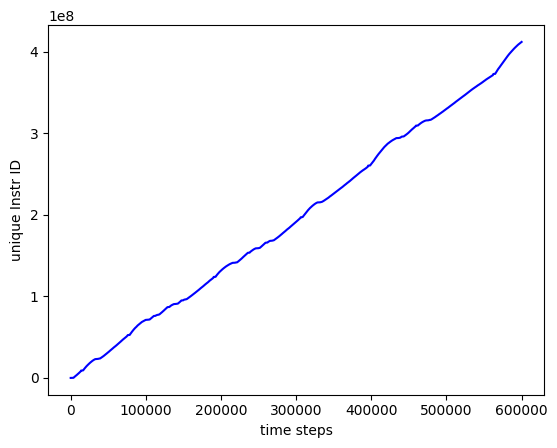

In [ ]:
import matplotlib.pyplot as plt
plt.plot(integer_list,  color='blue')
plt.xlabel('time steps')
plt.ylabel('unique Instr ID')

#plt.xlim(0, sorted(differences)[-11])  # Limit x-axis to top 10 bins
plt.show()

In [ ]:
!wc -l output.txt

741261 output.txt


In [ ]:
!head -10 output.txt

4, 1988336, 7fd244d2f, 559352c81b92, 0
7, 1988336, 7fd244d2e, 559352c81b92, 0
17, 1988336, 7fd244d2d, 559352c81b92, 0
29, 1988336, 7fd244d2b, 559352c81b92, 0
18, 1988336, 7fd244d29, 559352c81b92, 0
24, 1988336, 7fd244d28, 559352c81b92, 0
60, 1988336, 7fd244d27, 559352c81b92, 0
64, 1988336, 7fd244d25, 559352c81b92, 0
68, 1988336, 7fd244d23, 559352c81b92, 0
76, 1988336, 7fd244d20, 559352c81b92, 0


In [ ]:
!pip install attrdict tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
!python train.py --benchmark output.txt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
posix.uname_result(sysname='Linux', nodename='51f4023f7f60', release='5.15.109+', version='#1 SMP Fri Jun 9 10:57:30 UTC 2023', machine='x86_64') 0
Namespace(benchmark='output.txt', model_path=None, debug=False, config='./configs/base.yaml', print_every=None, auto_resume=False, checkpoint_every=None, tb_dir=None, model_name='voyager')
AttrDict({'name': 'Base Voyager', 'batch_size': 256, 'learning_rate': 0.001, 'learning_rate_decay': 2, 'min_learning_rate': 0.0001, 'num_epochs': 

In [ ]:
!python train.py --benchmark 623.xalancbmk-s5.txt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
posix.uname_result(sysname='Linux', nodename='51f4023f7f60', release='5.15.109+', version='#1 SMP Fri Jun 9 10:57:30 UTC 2023', machine='x86_64') 0
Namespace(benchmark='623.xalancbmk-s5.txt', model_path=None, debug=False, config='./configs/base.yaml', print_every=None, auto_resume=False, checkpoint_every=None, tb_dir=None, model_name='voyager')
AttrDict({'name': 'Base Voyager', 'batch_size': 256, 'learning_rate': 0.001, 'learning_rate_decay': 2, 'min_learning_rate': 0.0001, 'num

In [ ]:
!python online.py --prefetch-file prefetch.txt --benchmark output.txt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
posix.uname_result(sysname='Linux', nodename='51f4023f7f60', release='5.15.109+', version='#1 SMP Fri Jun 9 10:57:30 UTC 2023', machine='x86_64') 0
Namespace(benchmark='output.txt', model_path=None, debug=False, config='./configs/base.yaml', print_every=None, auto_resume=False, checkpoint_every=None, tb_dir=None, model_name='voyager', prefetch_file='prefetch.txt')
AttrDict({'name': 'Base Voyager', 'batch_size': 256, 'learning_rate': 0.001, 'learning_rate_decay': 2, 'min_learning